In [107]:
#Importing the necessary modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import os
from tqdm import tqdm
from astropy.timeseries import BoxLeastSquares
from astropy import units as u
from Potato import plotparams
#End of Importing

In [108]:
#This is where the asassnid goes
id = 498216229432

In [109]:
def read_lightcurve_csv(asas_sn_id, guide = 'known_dipper_lightcurves/'):
    """
    Input: asas_sn_id of desired star

    Output: Two dataframes. One contains the V-band data for the star and the other contains the g-band data for the star.

    This function reads the data of the desired star by going to the corresponding file and copying the data of that file onto a
    data frame. This data frame is then sorted into two data frames by comparing the value in the Photo filter column. If the Photo 
    filter column data has a value of one, its row is sorted into the dataframe corresponding to the V-band. If the Photo filter column 
    data has a value of zero, it gets sorted into the dataframe corresponding to the g-band.
    """
    
    fname = os.path.join(guide, str(asas_sn_id)+'-light-curves.csv')

    dfv = pd.DataFrame()
    dfg = pd.DataFrame()

    fdata = pd.read_csv(fname, header=None)
    fdata.columns = ["JD", "Flux", "Flux Error", "Mag", "Mag Error", "Limit", "FWHM", "Filter", "Quality", "Camera"]

    dfv = fdata.loc[fdata["Filter"] == 'V'].reset_index(drop=True)
    dfg = fdata.loc[fdata["Filter"] == 'g'].reset_index(drop=True)

    return dfv, dfg
#End of read_lightcurve_csv function

In [110]:
# Converting to flux
dfv, dfg = read_lightcurve_csv(id, 'Research/ASASSN_LC_Data/')

x = dfg["JD"]
x = [float(k) for k in x]
b = pd.Series(x)
m = dfg["Mag"]
m = [float(i) for i in m]
a = pd.Series(m)
y = 10 **(-a/2.5)
y = y /np.median(y)

#dfg.head(10)
#print(type(x))

In [111]:
guess = 4

periodgrid = np.linspace(guess-1, guess+1, 10000)
durations = np.linspace(0.1, 0.9, 10)
model = BoxLeastSquares(x,y)
periodogram = model.power(periodgrid, durations)
t = periodogram.period[np.argmax(periodogram.power)]
print(t)

3.5912591259125914


In [112]:
dfg["OrbNum"] = b / t
dfg["Phase"] = dfg["OrbNum"] % 1

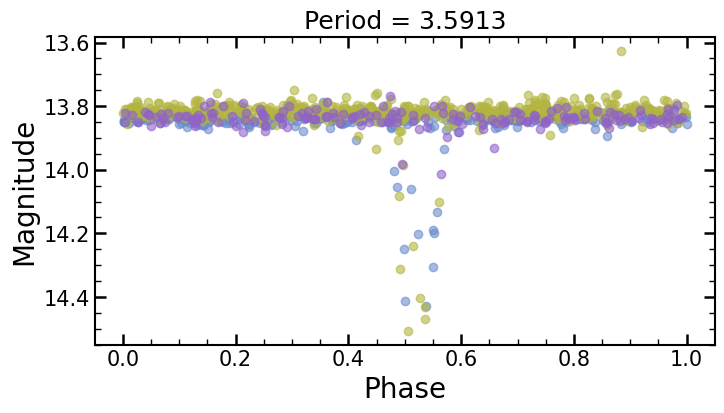

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
ax.set_title('Period = '+str(round(t,4)), fontsize = 18)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc']
    
camdf = pd.DataFrame()

for i in range(0,camnum):
        camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
        for j in range(0,len(camdf)):
            ax.scatter(camdf["Phase"][j], round(float(camdf["Mag"][j]),4), color = colors[i], alpha = 0.6)

ax.invert_yaxis() 
ax.set_xlabel('Phase', fontsize=20)
ax.set_ylabel('Magnitude', fontsize=20)
plt.show() 